In [199]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures

import os
from glob import glob
import tensorflow as tf
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

For new dataset that has been added

In [200]:
import pathlib
data_dir = pathlib.Path('C:/Diabetic Retinopathy Using Quantum Computing/Diabetic-Retinopathy-using-Quantum-Computing/Diabetic Retinopathy Dataset')

image_count = len(list(data_dir.glob('*/*')))
print(image_count)

2750


In [201]:
severity_labels = [name for name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, name))]

batch = 32
image_width = 256
image_height = 256

In [202]:
print(severity_labels)

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']


In [6]:
# k=0
# fig, ax = plt.subplots(1,5,figsize=(20,20))
# fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
#              fontname='monospace',color="#313131",y=0.62,x=0.4,alpha=0.8)

# for i in severity_labels:
#     j=0
#     while True :
#         if y_train[j]==i:
#             ax[k].imshow(X_train[j])
#             ax[k].set_title(y_train[j])
#             ax[k].axis('off')
#             k+=1
#             break
#         j+=1

In [42]:
healthy_source = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset\Healthy"
healthy_dir = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH\Healthy"


In [19]:
mild_source = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset\Mild DR" 
mild_dir = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH\Mild"

In [9]:
moderate_dir = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH\moderate"
moderate_source = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset\Moderate DR"

In [10]:
proliferate_source = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset\Proliferate DR"
proliferate_dir = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH\proliferate"

In [11]:
severe_source = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset\Severe DR"
severe_dir = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH\severe"

In [17]:
import random
import shutil
def convert(source_dir, dest_dir):
    all_images = os.listdir(source_dir)
    num_images_to_select = 50
    selected_indices = random.sample(range(len(all_images)), num_images_to_select)
    for index in selected_indices:
        image_filename = all_images[index]
        source_path = os.path.join(source_dir, image_filename)
        destination_path = os.path.join(dest_dir, image_filename)
        shutil.copy(source_path, dest_dir)



In [45]:
# convert(healthy_source,healthy_dir)

In [31]:
# convert(mild_source, mild_dir)

In [30]:
# convert(moderate_source,moderate_dir)

In [29]:
# convert(proliferate_source, proliferate_dir)

In [28]:
# convert(severe_source, severe_dir)

In [203]:
import pathlib
data_save = pathlib.Path('C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH')

image_count = len(list(data_save.glob('*/*')))
print(image_count)

857


In [204]:
severity_labels = [name for name in os.listdir(data_save) if os.path.isdir(os.path.join(data_save, name))]

batch = 30
image_width = 256
image_height = 256

In [205]:
print(severity_labels)

['Healthy', 'Mild', 'Moderate', 'Proliferate', 'Severe']


In [217]:
# # Define a mapping dictionary
# severity_mapping = {
#     'Healthy2': 'no_DR',
#     'moderate': 'DR',
#     'mild2': 'DR',
#     'severe': 'DR',
#     'proliferate' : 'DR'
#     # Add more mappings as needed
# }

# # Sample severity labels
# # severity_labels = ['healthy', 'moderate', 'DR', 'no_DR', 'moderate']

# # Apply the mapping
# mapped_severity_labels = [severity_mapping[label] for label in severity_labels]

# print(mapped_severity_labels)


In [51]:
# import random
# import shutil
# all_images = os.listdir(source_dir)
# num_images_to_select = 50
# selected_indices = random.sample(range(len(all_images)), num_images_to_select)
# for index in selected_indices:
#     image_filename = all_images[index]
#     source_path = os.path.join(source_dir, image_filename)
#     destination_path = os.path.join(healthy2_dir, image_filename)
#     shutil.copy(source_path, healthy2_dir)

In [49]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



In [109]:
print(severity_labels)
severity_mapping = {
    'Healthy2': 0,
    'moderate': 1,
    'severe': 1,
    'proliferate': 1,
    'mild2': 1
}
print(severity_mapping)

['Healthy', 'Mild', 'Moderate', 'Proliferate', 'Severe']
{'Healthy2': 0, 'moderate': 1, 'severe': 1, 'proliferate': 1, 'mild2': 1}


In [197]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(rescale=1./255,
#                                       zoom_range=0.2,
#                                       width_shift_range=0.2,
#                                       height_shift_range=0.2,
#                                       validation_split=0.2
#                                       )
# train_data = datagen.flow_from_directory('C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH',
#                                                      target_size=(224,224),
#                                                      batch_size=32,
#                                                      class_mode = 'categorical',
#                                                      subset = 'training')
                            

# valid_data = datagen.flow_from_directory('C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\SAVE_PATH',
#                                                      target_size=(224,224),
#                                                      batch_size=32,
#                                                      class_mode = 'categorical',
#                                                      subset = 'validation')

The approach we are taking is making multiple models of different number of images and different keras layers.
1. 293 images 
2. 857 images


Then use ensemble learning like Bagging, Boosting and Stacking.


In [210]:
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
x_train = []
y_train = []

# for j in tqdm(severity_mapping.keys()):
#         folderPath = os.path.join(data_save,j)
#         for k in tqdm(os.listdir(folderPath)):
#             img = cv2.imread(os.path.join(folderPath,k))
#             img = cv2.resize(img, (image_width,image_height))
#             x_train.append(img)
#             y_train.append(j)
            
# x_train = np.array(x_train)
# y_train = np.array(y_train)

# # x_train, y_train = shuffle(x_train,y_train, random_state=101)
# x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.3,random_state=101)
# from keras.utils import to_categorical

# # Perform one-hot encoding on y_train and y_test
# y_train_encoded = to_categorical(y_train, num_classes=2)
# y_test_encoded = to_categorical(y_test, num_classes=2)
# # Normalize pixel values within 0 and 1
# x_train = x_train / 255
# x_test = x_test / 255

# print(y_train[0])
# # Add extra dimension for convolution channels
# x_train = np.array(x_train[..., tf.newaxis], requires_grad=False)
# x_test = np.array(x_test[..., tf.newaxis], requires_grad=False)

# print(y_train[1])
severity_mapping = {
    'Healthy': 'Healthy',
    'Moderate': 'Moderate',
    'Severe': 'Severe',
    'Proliferate': 'Proliferate',
    'Mild': 'Mild'
}


for label in tqdm(severity_mapping.keys()):
    folderPath = os.path.join(data_save, label)
    label_index = severity_mapping[label]  # Get the integer label from the mapping
    for filename in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_width, image_height))
        x_train.append(img)
        y_train.append(label_index)  # Append the integer label

x_train = np.array(x_train)
y_train = np.array(y_train)

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=101)

# Perform one-hot encoding on y_train and y_test
# num_classes = len(set(y_train))
# y_train_encoded = to_categorical(y_train, num_classes=num_classes)
# y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Normalize pixel values within 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add extra dimension for convolution channels
# x_train = np.array(x_train[..., tf.newaxis], requires_grad=False)
# x_test = np.array(x_test[..., tf.newaxis], requires_grad=False)

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


In [211]:
y_train[0]

'Mild'

In [214]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(599, 256, 256, 3)
(599,)
(258, 256, 256, 3)
(258,)


In [215]:
print("Y-TEST: ",y_test.shape)
print("Y-TRAIN: ",y_train.shape)

Y-TEST:  (258,)
Y-TRAIN:  (599,)


In [182]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from tensorflow import keras
import matplotlib.pyplot as plt

In [183]:
n_epochs = 150   # Number of optimization epochs
n_layers = 3    # Number of random layers
n_train = 399   # Size of the train dataset
n_test =  258   # Size of the test dataset
# Train - 687 images belonging to 5 classes.
# Test - 170 images belonging to 5 classes.

SAVE_PATH = "C:/Diabetic Retinopathy Using Quantum Computing/Diabetic-Retinopathy-using-Quantum-Computing/SAVE_PATH" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [66]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev, interface="autograd")
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [67]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

     # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [228]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(x_train):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(x_test):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:
599/399        
Quantum pre-processing of test images:


In [229]:
q_train_images.shape
q_test_images.shape

(258, 14, 14, 4)

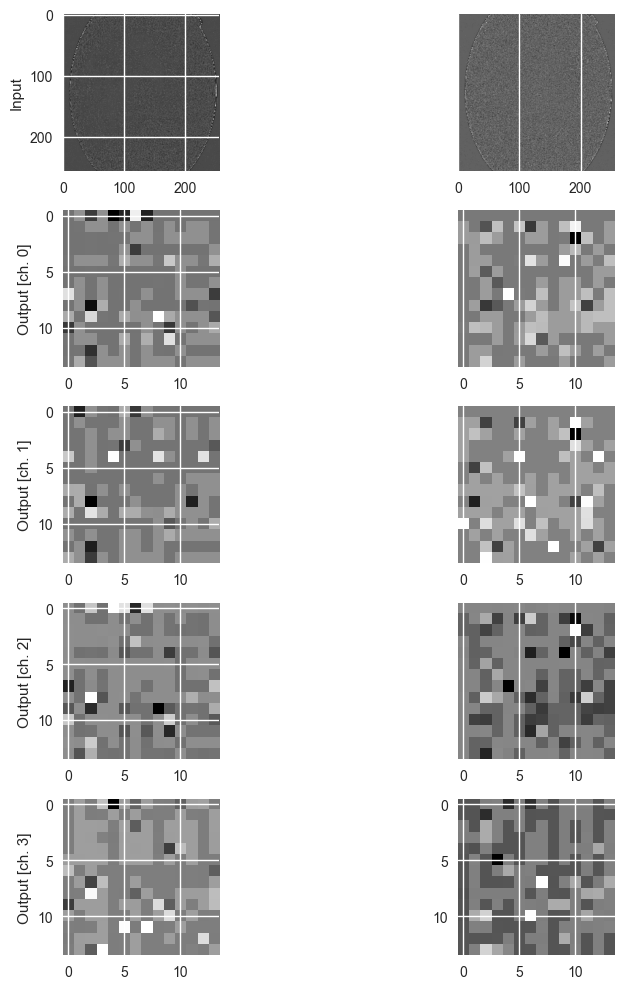

In [260]:
n_samples = 2
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(x_train[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

In [231]:
x_train.shape

(599, 256, 256, 3)

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetV2M

In [219]:
y_test.shape

(258,)

In [220]:
y_train.shape

(599,)

In [190]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1


In [248]:
from keras import metrics
from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
def MyModel(num_classes):
    
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(14, 14, 4)),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        # keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax")  
         
    ])
    
    model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])
    
    return model


In [233]:
y_train

array(['Mild', 'Mild', 'Proliferate', 'Moderate', 'Proliferate', 'Mild',
       'Healthy', 'Healthy', 'Mild', 'Healthy', 'Severe', 'Proliferate',
       'Healthy', 'Proliferate', 'Moderate', 'Healthy', 'Healthy', 'Mild',
       'Healthy', 'Severe', 'Severe', 'Mild', 'Mild', 'Proliferate',
       'Moderate', 'Healthy', 'Proliferate', 'Healthy', 'Severe',
       'Severe', 'Healthy', 'Mild', 'Moderate', 'Moderate', 'Healthy',
       'Healthy', 'Healthy', 'Severe', 'Mild', 'Mild', 'Mild', 'Moderate',
       'Healthy', 'Moderate', 'Proliferate', 'Moderate', 'Moderate',
       'Healthy', 'Healthy', 'Proliferate', 'Healthy', 'Severe',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Moderate',
       'Moderate', 'Mild', 'Severe', 'Moderate', 'Mild', 'Severe',
       'Healthy', 'Proliferate', 'Healthy', 'Moderate', 'Severe',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Moderate',
       'Proliferate', 'Mild', 'Healthy', 'Healthy', 'Proliferate',
       'Moderate', 'Severe'

In [234]:
q_train_images.shape

(599, 14, 14, 4)

In [241]:
def lr_rate(epoch,lr):
    if epoch<50:
        lr=0.0001
        return lr
    elif epoch<=100:
        lr=0.0001
        return lr
    elif epoch<=150:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [236]:
from keras.utils import to_categorical
# Define a mapping from class labels to integer labels
class_to_int = {
    'Healthy': 0,
    'Moderate': 1,
    'Mild': 2,
    'Proliferate': 3,
    'Severe': 4,
}
#
# Convert y labels to integer labels using the mapping
y_train_int = [class_to_int[label] for label in y_train]
y_test_int = [class_to_int[label] for label in y_test]

# Convert integer labels to one-hot encoded labels
num_classes = 5  # Number of classes
y_train_encoded = to_categorical(y_train_int, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_int, num_classes=num_classes)

In [255]:

num_classes = 5
q_model = MyModel(5)

# history= q_model.fit(q_train_images,validation_data = q_test_images,callbacks=[lr_callback],epochs=40,verbose=1)
q_history = q_model.fit(
    q_train_images,
    y_train_encoded,
    validation_data=(q_test_images,y_test_encoded),
    callbacks=[lr_callback],
    batch_size=64,
    epochs=700,
    verbose=2,
)

Epoch 1/700
10/10 - 4s - loss: 1.6071 - acc: 0.2070 - val_loss: 1.5987 - val_acc: 0.2907 - lr: 1.0000e-04 - 4s/epoch - 386ms/step
Epoch 2/700
10/10 - 0s - loss: 1.6020 - acc: 0.2471 - val_loss: 1.5941 - val_acc: 0.2946 - lr: 1.0000e-04 - 287ms/epoch - 29ms/step
Epoch 3/700
10/10 - 0s - loss: 1.5987 - acc: 0.2504 - val_loss: 1.5898 - val_acc: 0.2946 - lr: 1.0000e-04 - 252ms/epoch - 25ms/step
Epoch 4/700
10/10 - 0s - loss: 1.5972 - acc: 0.2538 - val_loss: 1.5872 - val_acc: 0.2984 - lr: 1.0000e-04 - 174ms/epoch - 17ms/step
Epoch 5/700
10/10 - 0s - loss: 1.5960 - acc: 0.2538 - val_loss: 1.5855 - val_acc: 0.2984 - lr: 1.0000e-04 - 202ms/epoch - 20ms/step
Epoch 6/700
10/10 - 0s - loss: 1.5959 - acc: 0.2538 - val_loss: 1.5841 - val_acc: 0.2984 - lr: 1.0000e-04 - 278ms/epoch - 28ms/step
Epoch 7/700
10/10 - 0s - loss: 1.5946 - acc: 0.2588 - val_loss: 1.5857 - val_acc: 0.2984 - lr: 1.0000e-04 - 284ms/epoch - 28ms/step
Epoch 8/700
10/10 - 0s - loss: 1.5940 - acc: 0.2588 - val_loss: 1.5844 - val_a

In [256]:
q_model.save('saved_model2.h5')

C:\Users\manya\AppData\Local\Temp\ipykernel_24552\2462070899.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


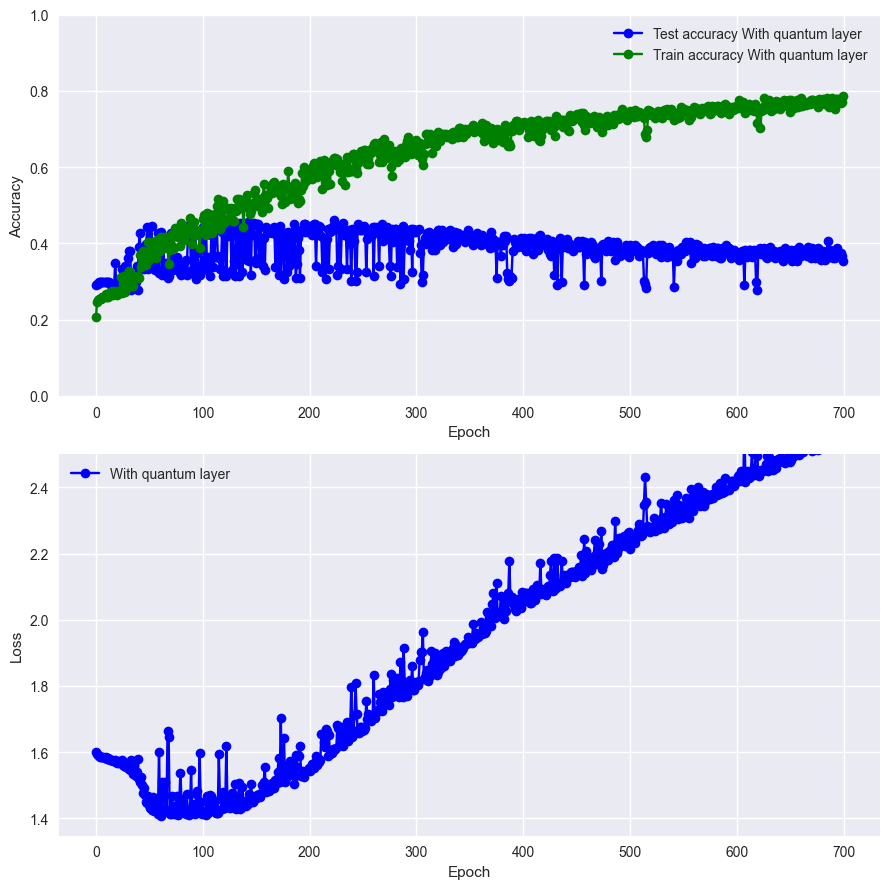

In [259]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9))

ax1.plot(q_history.history["val_acc"], "-ob", label="Test accuracy With quantum layer")
ax1.plot(q_history.history["acc"], "-og", label="Train accuracy With quantum layer")
# ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
# ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()